<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Period-2005---2019" data-toc-modified-id="Period-2005---2019-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Period 2005 - 2019</a></span></li><li><span><a href="#Dennis-Aschenbrenner" data-toc-modified-id="Dennis-Aschenbrenner-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dennis Aschenbrenner</a></span></li><li><span><a href="#Column-Description" data-toc-modified-id="Column-Description-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Column Description</a></span></li><li><span><a href="#Dealing-with-NaNs" data-toc-modified-id="Dealing-with-NaNs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Dealing with NaNs</a></span></li><li><span><a href="#Imputation" data-toc-modified-id="Imputation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Imputation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Data Exploration</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis 
## Period 2005 - 2019
## Dennis Aschenbrenner

In [129]:
# import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn import preprocessing
sns.set()

In [130]:
# load data
df = pd.read_csv('weather_data.csv',index_col='MESS_DATUM', parse_dates=True)
pd.set_option('display.max_columns', df.shape[1])
df.head()

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_CSA,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_CSA,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_CSA,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_CSA,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,2005010100,120.0,0.0,0.0,0,148.86,0.0,4.7,95.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020.2,NaN,2.2,350,-999.0,5.6,5.5,5.2,4.6,5.2,2000.0
2005-01-01 01:00:00,2005010101,100.0,0.0,0.0,0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,ST-999,90.0,1.0,6.0,SC-999,1050.0,7.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1020.5,NaN,1.5,310,-999.0,5.3,5.4,5.2,4.6,5.1,3500.0
2005-01-01 02:00:00,2005010102,89.0,0.0,0.0,0,138.39,0.0,3.1,96.0,2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.3,NaN,1.5,280,-999.0,4.7,5.1,5.1,4.6,5.1,800.0
2005-01-01 03:00:00,2005010103,104.0,0.0,0.0,0,130.31,0.0,2.8,100.0,2.8,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.7,0.0,2.5,290,-999.0,4.1,4.8,5.1,4.7,5.2,300.0
2005-01-01 04:00:00,2005010104,111.0,0.0,0.0,0,121.57,0.0,2.2,97.0,1.8,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.5,0.0,0.8,210,-999.0,3.8,4.5,4.9,4.7,5.2,300.0


## Column Description

|Parameter | Description|Unit|
|:---------|:-----------|:----|
|MESS_DATUM    | date with hours|-|
|ATMO_LBERG    | hourly sum of atmospheric back radiation| J/cm^2 |
|FD_LBERG      |hourly sum of diffuse solar radiation    | J/cm^2 |
|FG_LBERG      |hourly sum of global radiation           | J/cm^2 |
|SD_LBERG      |hourly sum of sun duration| min |      
|ZENIT              |zenith angle of sun | degrees|
|R1                 |precipitation | mm|
|TT_TU              |temperature | °C|
|RF_TU              |relative Humidity | %|
|TD                 |dew point | °C|
|V_N                |total cloud cover | 1/8 (0/8 ...8/8) |
|V_S1_CS            |cloud type of 1. layer | 0...10
|V_S1_CSA           |abbrev. of cloud type|-|
|V_S1_HHS           |height of 1. layer |m|
|V_S1_NS            |cloud cover of 1. layer |1/8 (0/8 ...8/8)|
|V_S2_CS            |cloud type of 2. layer |0/10|
|V_S2_CSA           |abbrev. cloud type 2.layer|-| 
|V_S2_HHS           |height of 2.layer| m|
|V_S2_NS            |cloud cover of 2. layer |1/8|(0/8 ...8/8)
|V_S3_CS            |cloud type of 3. layer |0...10|
|V_S3_CSA           |abbrev. cloud type 3.layer| 0...10|
|V_S3_HHS           |height of 3.layer |m|
|V_S3_NS            |cloud cover of 3. layer |1/8 (0/8 ...8/8)|
|V_S4_CS            |cloud type of 4. layer |0...10|  
|V_S4_CSA           |abbrev. cloud type 4.layer|-|  
|V_S4_HHS           |height of 4.layer |m|
|V_S4_NS            |cloud cover of 4. layer |1/8 (0/8 ...8/8)|
|P                  |pressure at sea level |mbar|
|SD_SO              |sun duration  |min|
|FF                 |mean wind speed  |m/s|
|DD                 |wind direction  |degree|
|V_TE002            |soil temperature  |2 cm depth|
|V_TE005            |soil temperature | 5 cm depth|
|V_TE010            |soil temperature |10 cm depth|
|V_TE020            |soil temperature | 20 cm depth|
|V_TE050            |soil temperature | 50 cm depth|
|V_TE100            |soil temperature | 100 cm depth|
|V_VV               |visibility | m|


|cloud type |Abbreviation|
|:--------- |:----|
|Cirrus |                    0 CI|
|Cirrocumulus |              1 CC|
|Cirrostratus|               2 CS|
|Altocumulus |               3 AC|
|Altostratus |               4 AS|
|Nimbostratus|               5 NS|
|Stratocumulus|              6 SC|
|Stratus   |                 7 ST|
|Cumulus |                   8 CU|
|Cumulonimbus|               9 CB|
|Cloudless |                10|

In [88]:
# shape of dataframe
df.shape

(129984, 38)

In [89]:
# format information 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129984 entries, 2005-01-01 00:00:00 to 2019-10-30 23:00:00
Data columns (total 38 columns):
a             129984 non-null int64
ATMO_LBERG    129984 non-null float64
FD_LBERG      129984 non-null float64
FG_LBERG      129984 non-null float64
SD_LBERG      129984 non-null int64
ZENIT         129984 non-null float64
R1            129932 non-null float64
TT_TU         129984 non-null float64
RF_TU         129984 non-null float64
TD            129984 non-null float64
V_N           129964 non-null float64
V_S1_CS       30686 non-null float64
V_S1_CSA      30686 non-null object
V_S1_HHS      30686 non-null float64
V_S1_NS       30686 non-null float64
V_S2_CS       30686 non-null float64
V_S2_CSA      30686 non-null object
V_S2_HHS      30686 non-null float64
V_S2_NS       30686 non-null float64
V_S3_CS       30686 non-null float64
V_S3_CSA      30686 non-null object
V_S3_HHS      30686 non-null float64
V_S3_NS       30686 non-null float64


## Dealing with NaNs

In [131]:
# set all given nan-values to np.nan (-999 and ST-999)

df1 = df.replace(-999, np.nan)
df1 = df1.replace(-999.0, np.nan)

In [132]:
df1.head()

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_CSA,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_CSA,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_CSA,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_CSA,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,2005010100,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020.2,NaN,2.2,350.0,NaN,5.6,5.5,5.2,4.6,5.2,2000.0
2005-01-01 01:00:00,2005010101,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,ST-999,90.0,1.0,6.0,SC-999,1050.0,7.0,NaN,-999,NaN,NaN,NaN,-999,NaN,NaN,1020.5,NaN,1.5,310.0,NaN,5.3,5.4,5.2,4.6,5.1,3500.0
2005-01-01 02:00:00,2005010102,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.3,NaN,1.5,280.0,NaN,4.7,5.1,5.1,4.6,5.1,800.0
2005-01-01 03:00:00,2005010103,104.0,0.0,0.0,0.0,130.31,0.0,2.8,100.0,2.8,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.7,0.0,2.5,290.0,NaN,4.1,4.8,5.1,4.7,5.2,300.0
2005-01-01 04:00:00,2005010104,111.0,0.0,0.0,0.0,121.57,0.0,2.2,97.0,1.8,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.5,0.0,0.8,210.0,NaN,3.8,4.5,4.9,4.7,5.2,300.0


In [133]:
# drop not relevant columns
df1 = df1.drop(columns=(['V_S1_CSA','V_S2_CSA','V_S3_CSA','V_S4_CSA']))
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129984 entries, 2005-01-01 00:00:00 to 2019-10-30 23:00:00
Data columns (total 34 columns):
a             129984 non-null int64
ATMO_LBERG    109667 non-null float64
FD_LBERG      126243 non-null float64
FG_LBERG      127003 non-null float64
SD_LBERG      126830 non-null float64
ZENIT         129984 non-null float64
R1            129795 non-null float64
TT_TU         129966 non-null float64
RF_TU         129965 non-null float64
TD            129965 non-null float64
V_N           129964 non-null float64
V_S1_CS       30490 non-null float64
V_S1_HHS      30491 non-null float64
V_S1_NS       30491 non-null float64
V_S2_CS       27446 non-null float64
V_S2_HHS      27439 non-null float64
V_S2_NS       27446 non-null float64
V_S3_CS       9141 non-null float64
V_S3_HHS      9141 non-null float64
V_S3_NS       9141 non-null float64
V_S4_CS       4271 non-null float64
V_S4_HHS      4271 non-null float64
V_S4_NS       4271 non-null float64
P

In [134]:
# look on statistics: chance to find outliers
df1.describe()

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
count,1.299840e+05,109667.000000,126243.000000,127003.000000,126830.000000,129984.000000,129795.000000,129966.000000,129965.000000,129965.000000,129964.000000,30490.000000,30491.000000,30491.000000,27446.000000,27439.000000,27446.000000,9141.000000,9141.000000,9141.000000,4271.0,4271.000000,4271.000000,129963.000000,97654.000000,129964.000000,129964.000000,0.0,129437.000000,129442.000000,129442.000000,129446.000000,129378.000000,129975.000000
mean,2.011986e+09,115.546992,20.866654,40.573286,11.008176,89.446132,0.086278,10.012803,79.341176,6.187210,5.412022,6.876582,900.237119,2.431308,4.716498,2534.095266,5.061867,3.752434,3480.774532,6.489881,9.0,727.199719,2.604776,1015.002724,14.965511,4.014506,198.098243,NaN,11.037685,10.990087,10.985662,10.904196,10.797915,23266.441777
std,4.278065e+06,16.064409,31.705476,68.415564,20.480009,29.071783,0.478587,7.387662,15.968411,6.151484,2.659634,1.431234,1042.168901,1.502495,2.280567,2440.143072,1.591091,2.265688,2590.303099,0.894691,0.0,391.297879,1.592934,9.751789,22.678347,2.168905,91.431777,NaN,8.112351,7.516287,6.901643,5.981768,4.926299,13885.020069
min,2.005010e+09,59.000000,0.000000,0.000000,0.000000,30.720000,0.000000,-17.600000,16.000000,-21.200000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,60.000000,1.000000,0.000000,90.000000,3.000000,9.0,90.000000,1.000000,969.900000,0.000000,0.000000,0.000000,NaN,-9.800000,-8.100000,-4.700000,-0.100000,2.000000,0.000000
25%,2.008092e+09,106.000000,0.000000,0.000000,0.000000,68.070000,0.000000,4.700000,70.000000,2.000000,3.000000,6.000000,300.000000,1.000000,3.000000,810.000000,4.000000,3.000000,1200.000000,6.000000,9.0,480.000000,1.000000,1009.200000,0.000000,2.400000,120.000000,NaN,4.300000,4.600000,5.000000,5.600000,6.300000,10000.000000
50%,2.012057e+09,117.000000,1.000000,1.000000,0.000000,89.370000,0.000000,9.900000,84.000000,6.500000,7.000000,7.000000,600.000000,2.000000,6.000000,1500.000000,5.000000,4.000000,3000.000000,7.000000,9.0,660.000000,2.000000,1015.400000,0.000000,3.700000,220.000000,NaN,10.400000,10.600000,10.700000,10.700000,10.800000,25000.000000
75%,2.016021e+09,127.000000,33.000000,53.000000,9.000000,110.620000,0.000000,15.300000,92.000000,11.000000,8.000000,8.000000,1050.000000,3.000000,6.000000,3600.000000,7.000000,6.000000,4500.000000,7.000000,9.0,900.000000,3.000000,1021.300000,29.000000,5.400000,270.000000,NaN,16.900000,16.900000,16.800000,16.400000,15.500000,35000.000000
max,2.019103e+09,158.000000,260.000000,354.000000,60.000000,149.280000,38.700000,36.300000,100.000000,22.500000,8.000000,8.000000,13500.000000,8.000000,8.000000,18000.000000,8.000000,8.000000,12000.000000,8.000000,9.0,7500.000000,8.000000,1047.700000,60.000000,17.900000,360.000000,NaN,38.900000,34.600000,29.700000,24.700000,21.000000,80000.000000


In [135]:
nans = df1.isna().sum()


In [136]:
# calculating missing vlaues per feature
zeros = (df1==0).sum()
nanzero = pd.concat([nans,nans/(len(df1))*100, zeros, zeros/(len(df1))*100],axis =1)
nanzero = nanzero.rename(columns={0: 'NaNs', 1: 'NaNs_per', 2: 'Zeros', 3: 'Zeros_per'})
nanzero

,NaNs,NaNs_per,Zeros,Zeros_per
a,0,0.000000,0,0.000000
ATMO_LBERG,20317,15.630385,0,0.000000
FD_LBERG,3741,2.878047,61015,46.940393
FG_LBERG,2981,2.293359,61339,47.189654
SD_LBERG,3154,2.426452,88343,67.964519
ZENIT,0,0.000000,0,0.000000
R1,189,0.145403,114831,88.342411
TT_TU,18,0.013848,321,0.246953
RF_TU,19,0.014617,0,0.000000
TD,19,0.014617,523,0.402357


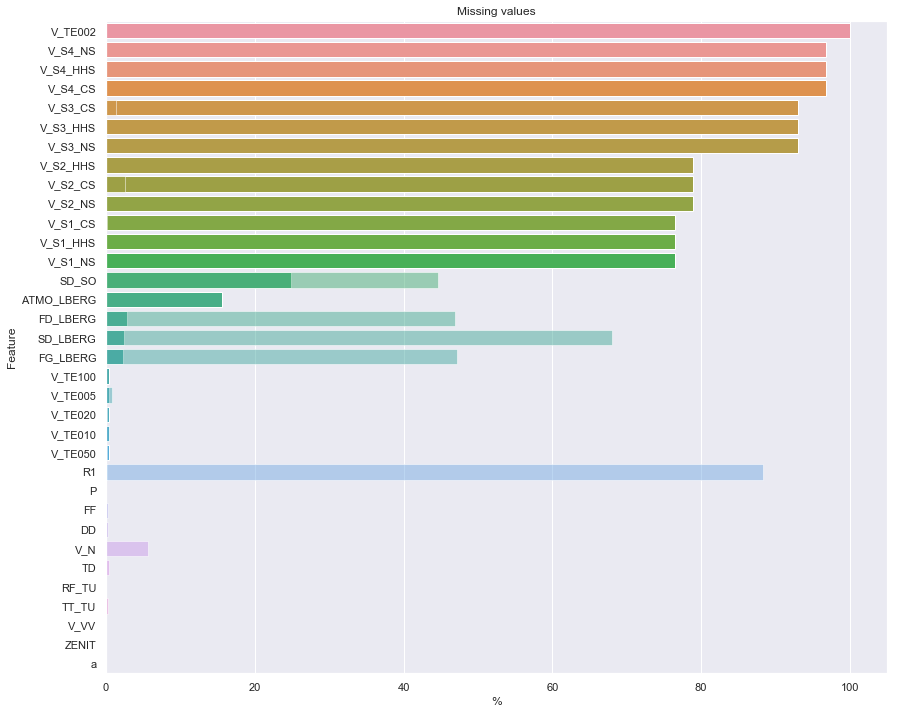

In [137]:
# Plot NaNs and Zeros in dataset

perc = pd.concat([(df1.isnull().sum()/len(df1)*100),((df1==0).sum()/len(df1)*100)],axis=1)
perc = perc.rename(columns={0: "NaN", 1: "Zero"})
perc = perc.sort_values(by=['NaN'],ascending=False)
plt.figure(figsize=(14,12))
ax = sns.barplot(y=perc.index[:37], x=perc.iloc[0:37,0],alpha=1)
ax = sns.barplot(y=perc.index[:37], x=perc.iloc[0:37,1],alpha=0.5)

plt.title('Missing values')
plt.ylabel('Feature')
plt.xlabel('%')
plt.show();

In [138]:
# Picture above shows that soil temperature in 2 cm depth is completely missing and the cloud layers 2 3 4 have
# over 50% missing values. Radiation parameters FD, FG, SD have a lot of zeros but this is normal. Precipitation
# R1 is most of the time zero, it's clear

In [139]:
## Drop all columns with a high amount of NaNs
## that are cloud coverage and type of the 2. 3. and 4. layers and soil temperature in 2 cm depth

cols = nanzero[nanzero.NaNs_per > 50].index
df2 = df1.drop(columns=(cols))
df2.head()

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,P,SD_SO,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,2005010100,120.0,0.0,0.0,0.0,148.86,0.0,4.7,95.0,4.0,7.0,1020.2,NaN,2.2,350.0,5.6,5.5,5.2,4.6,5.2,2000.0
2005-01-01 01:00:00,2005010101,100.0,0.0,0.0,0.0,144.98,0.1,4.3,95.0,3.6,7.0,1020.5,NaN,1.5,310.0,5.3,5.4,5.2,4.6,5.1,3500.0
2005-01-01 02:00:00,2005010102,89.0,0.0,0.0,0.0,138.39,0.0,3.1,96.0,2.5,2.0,1021.3,NaN,1.5,280.0,4.7,5.1,5.1,4.6,5.1,800.0
2005-01-01 03:00:00,2005010103,104.0,0.0,0.0,0.0,130.31,0.0,2.8,100.0,2.8,-1.0,1021.7,0.0,2.5,290.0,4.1,4.8,5.1,4.7,5.2,300.0
2005-01-01 04:00:00,2005010104,111.0,0.0,0.0,0.0,121.57,0.0,2.2,97.0,1.8,-1.0,1021.5,0.0,0.8,210.0,3.8,4.5,4.9,4.7,5.2,300.0


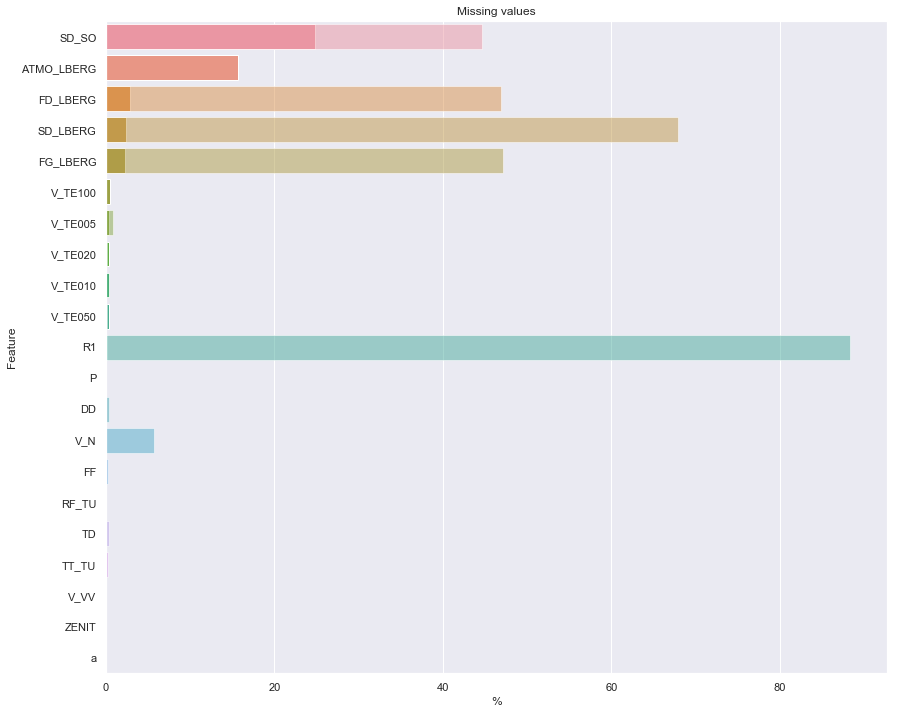

In [140]:
# Plot NaNs and Zeros after dropping columns with high amount of NaNs 

perc2 = pd.concat([(df2.isnull().sum()/len(df2)*100),((df2==0).sum()/len(df2)*100)],axis=1)
perc2 = perc2.rename(columns={0: "NaN", 1: "Zero"})
perc2 = perc2.sort_values(by=['NaN'],ascending=False)
plt.figure(figsize=(14,12))

ax1 = sns.barplot(y=perc2.index[:37], x=perc2.iloc[0:37,0],alpha=1)
ax2 = sns.barplot(y=perc2.index[:37], x=perc2.iloc[0:37,1],alpha=0.5)

plt.title('Missing values')
plt.ylabel('Feature')
plt.xlabel('%')

plt.show();

## Imputation

In [141]:
## Zeros are right. There is no need to handle them!


## ATMO_LBERG = atmospheric back radiation exists continuous -> imputation with interpolation

## FD_LBERG = Hourly sum of diffuse solar radiation in J/cm^2: not continuous -> imputation due to interpolation

## FG_LBERG = Hourly sum of global radiation in J/cm^2: not continuous -> imputation due to interpolation

## SD_LBERG = Hourly sum of sun duration in min: not continuous -> imputation due to interpolation

## V_S1_CS = cloud type of 1. layer cannot be imputed -> set to '10' for cloudless

## V_S1_HHS = height of 1. layer, 0 = mist in 0m height and NaN = not measured or cloudless -> set to -1 if 
## total cloud cover V_N is zero otherwise interpolate 

## V_S1_NS  = cloud cover of 1. layer in 1/8 (0...8) -> impute with zero if total cloud cover V_N is zero!

## R1 = precipitation sum: not continuous -> set to zero if NaN

## V_TE010, V_TE020, V_TE050, V_TE100 are soil temps in given depth: continuous -> impute with interpolation

## P, FF, DD, TD, RF_TU, TT_TU are all conituous -> impute with interpolation

## total cloud coverage V_N set to coverage of the 1. cloud layer, ozherwise interpolation

## visibility V_VV -> interpolation 

## SD_SO is also sun duration and will be dropped 

In [142]:
## Imputation due to interpolation, zero and '10' replacements

df2 = df2.drop(columns='SD_SO')  # dropping the sun duration column 

#for i in range(df2.shape[0]):             # replace nans of total cloud cov with values of cov of the 
    #if np.isnan(df2.V_N.iloc[i]):         # 1. cloud layer
        #df2.V_N[i] = df2.V_S1_NS[i]
        
liste=['ATMO_LBERG','FD_LBERG','FG_LBERG','SD_LBERG','V_TE005','V_TE010', 'V_TE020', 'V_TE050', 'V_TE100',
      'P', 'FF', 'DD', 'TD', 'RF_TU', 'TT_TU','V_VV','V_N']

for i in liste:                           # interpolation
    df2[i].interpolate(inplace=True)
    
df2['R1'].replace(np.nan,0,inplace=True)  # replace nans of precipitation to zero

## dropping cloud coverage of the 1. layer: assumption the total cloud coverage = coverage of the 1. layer
#df2 = df2.drop(columns='V_S1_NS')

#df2.V_S1_CS.replace(-1,1,inplace=True)    # replace cloid type -1 with 1

In [143]:
#mask = (df2['V_N'] == 0) & (df2['V_S1_CS'].isna())       # if cloud coverage is zero replace cloud type with 10
#df2['V_S1_CS'][mask] = 10

#mask1 = (df2['V_S1_HHS'] == 0) & (df2['V_S1_CS'].isna()) # set cloud type to 7 if cloud height = 0m
#df2['V_S1_CS'][mask1] = 7

#mask2 = ((df2['V_S1_HHS'] == 0) & (df2['V_N'] == -1))    # set cloud coverage to 8 if cloud height = 0m
#df2['V_N'][mask2] = 8

index = df2[df2['V_N'] == -1].index.tolist()        # drop rows where there is no information about cloud
df2 = df2.drop(index)                               # type, height and coverage

In [144]:
df2.V_N = df2.V_N.round()                                 # round the total cloud coverage

groups = df2.groupby(['V_N']).mean()
groups

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,P,FF,DD,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
V_N,,,,,,,,,,,,,,,,,,,
0.0,2.011753e+09,97.604704,6.377998,29.706382,12.652003,103.976705,0.000000,7.709487,77.191482,3.361260,1021.445986,2.875594,154.471648,9.717974,10.370898,10.931338,10.797141,10.363717,27786.890699
1.0,2.012039e+09,102.905502,13.287362,61.573938,25.952561,87.775954,0.000289,11.216030,72.238617,5.642282,1019.266705,3.261811,180.074290,13.191356,13.163086,13.085450,12.572702,11.874633,32020.333053
2.0,2.011916e+09,105.335764,16.590966,61.602041,24.017253,87.637273,0.002353,11.668358,73.375360,6.444215,1017.618070,3.510657,190.940666,13.418894,13.315522,13.180031,12.716090,12.131133,30468.939964
3.0,2.011955e+09,107.245620,23.425424,69.583073,23.605025,84.342222,0.009634,12.052682,72.368035,6.634998,1016.654207,3.786640,200.972516,13.866577,13.537704,13.209759,12.734544,12.216941,30644.137425
4.0,2.011886e+09,109.890933,29.918757,73.133033,22.484171,81.411111,0.015027,12.328413,72.178672,6.919154,1015.770123,4.019331,208.194054,14.061032,13.597715,13.189294,12.752968,12.286456,30063.119361
5.0,2.012012e+09,111.367026,31.939043,66.704659,19.164544,81.969512,0.028176,12.185875,73.101582,7.013285,1015.247343,4.039310,207.697726,13.681636,13.304786,12.986187,12.611641,12.177441,29374.553880
6.0,2.011845e+09,113.811296,34.914628,59.907351,15.453359,81.419395,0.036452,12.054782,74.543031,7.258348,1014.384383,4.204636,210.199906,13.315581,12.972906,12.684359,12.370050,12.013725,28007.806664
7.0,2.012046e+09,118.205340,26.945829,33.342691,4.484202,87.015449,0.068335,10.441340,79.683433,6.836611,1013.492742,4.216039,207.937474,11.103414,11.040951,11.034645,11.014275,10.968006,23517.846476
8.0,2.012035e+09,120.397337,9.647288,9.981949,0.098278,96.837715,0.234987,7.220126,89.045246,5.456042,1012.723340,4.426235,196.060081,7.401300,7.536112,7.778314,8.169259,8.693187,11631.599383


In [105]:
# checking missing vlaues of cloud type of the 1. cloud layer
#df2.V_S1_CS.isna().sum()

In [106]:
# replace NaNs in cloud type with mean cloud type of every coverage
#for i in np.arange(0,9,1):          
    #mask = (df2['V_N'] == i) & (df2['V_S1_CS'].isna())       
    #df2['V_S1_CS'][mask] = groups.V_S1_CS[i].round()

In [107]:
#df2.V_S1_CS.isna().sum()   # now there are no missing values more!

In [108]:
# group by cloud type of the 1. cloud layer with mean
#groups_CS = df2.groupby(['V_S1_CS']).mean()
#groups_CS

In [109]:
# replace NaNs in cloud height with mean cloud type of every coverage
#for i in (0,1,2,3,4,5,6,7,8,10):        
    #mask = (df2['V_S1_CS'] == i) & (df2['V_S1_HHS'].isna())       
    #df2['V_S1_HHS'][mask] = groups_CS.V_S1_HHS[i]

In [110]:
## BAD ASSUMPTION, because height 0 means there is mist

#mask3 = ((df2['V_S1_CS'] == 10) & df2['V_S1_HHS'].isna())     # set cloud height to 0 if cloud type = 10
#df2.V_S1_HHS[mask3] = 0  

## otherwise the column cloud height has to be dropped from dataset!

In [111]:
df2.isna().sum()

a             0
ATMO_LBERG    0
FD_LBERG      0
FG_LBERG      0
SD_LBERG      0
ZENIT         0
R1            0
TT_TU         0
RF_TU         0
TD            0
V_N           0
P             0
FF            0
DD            0
V_TE005       0
V_TE010       0
V_TE020       0
V_TE050       0
V_TE100       0
V_VV          0
dtype: int64

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129579 entries, 2005-01-01 00:00:00 to 2019-10-30 23:00:00
Data columns (total 20 columns):
a             129579 non-null int64
ATMO_LBERG    129579 non-null float64
FD_LBERG      129579 non-null float64
FG_LBERG      129579 non-null float64
SD_LBERG      129579 non-null float64
ZENIT         129579 non-null float64
R1            129579 non-null float64
TT_TU         129579 non-null float64
RF_TU         129579 non-null float64
TD            129579 non-null float64
V_N           129579 non-null float64
P             129579 non-null float64
FF            129579 non-null float64
DD            129579 non-null float64
V_TE005       129579 non-null float64
V_TE010       129579 non-null float64
V_TE020       129579 non-null float64
V_TE050       129579 non-null float64
V_TE100       129579 non-null float64
V_VV          129579 non-null float64
dtypes: float64(19), int64(1)
memory usage: 20.8 MB


## Data Exploration


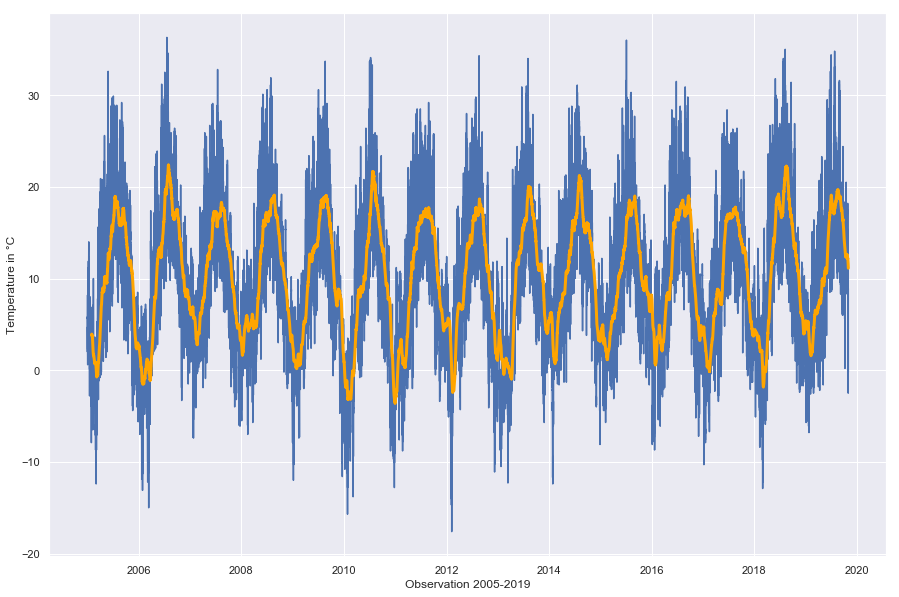

In [114]:
# plot target variable: Temperature
plt.figure(figsize=(15,10))

rolling_mean = df2.TT_TU.rolling(window=730).mean()   # 730 = monthly moving average
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel('Temperature in °C');
plt.plot(df2.TT_TU)

# set rolling mean on monthly basis
plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

# temperature curve ist similar for every year of 15 years, year 2018 has a higher rolling mean

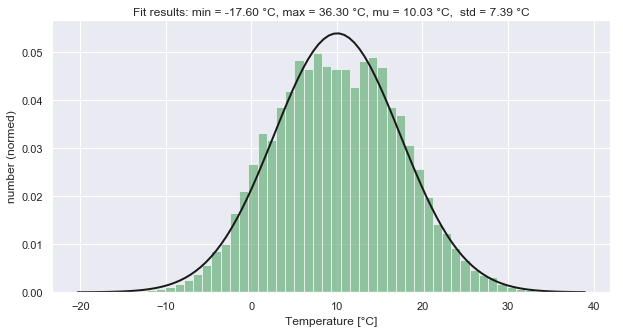

In [145]:
# plot distribution of temperature

plt.figure(figsize=(10,5))
plt.hist(df2.TT_TU, bins=50, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.TT_TU)
μ = mu[0]
σ = mu[1]
minimum = df2.TT_TU.min()
maximum = df2.TT_TU.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} °C, max = {:.2f} °C, mu = {:.2f} °C,  std = {:.2f} °C".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Temperature [°C]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.savefig('Images/Tempdist.png', dpi=500);

# plot shows gaussian distribution but with a flat top (2 tops ... one for winter around 7 degrees and 
# 15 for summer) 

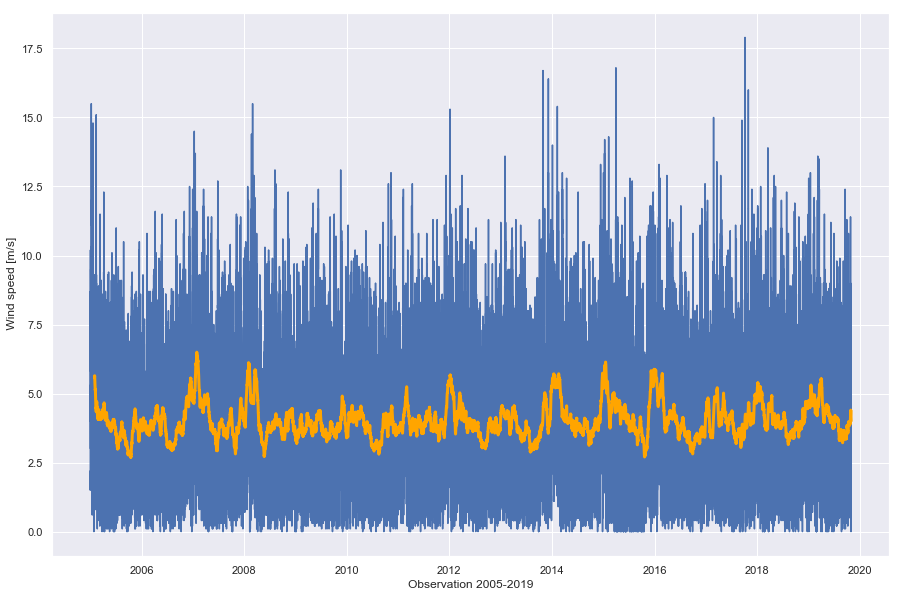

In [118]:
# plot target variable: Wind speed

plt.figure(figsize=(15,10))

rolling_mean = df2.FF.rolling(window=730).mean()    
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel(' Wind speed [m/s]');
plt.plot(df2.FF)

# set rolling mean 
plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

# wind speed has noisy curve, no seasonal cicles

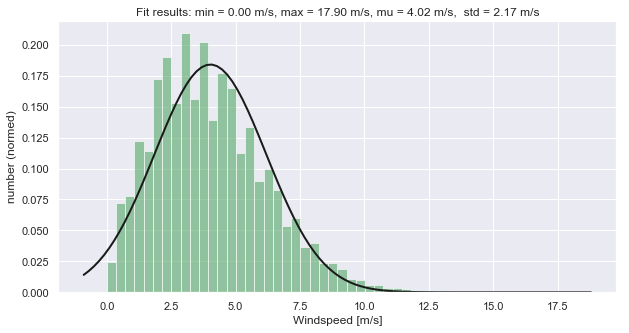

In [146]:
# creating distribution plot of wid speed

plt.figure(figsize=(10,5))
plt.hist(df2.FF, bins=50, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.FF)
μ = mu[0]
σ = mu[1]
minimum = df2.FF.min()
maximum = df2.FF.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} m/s, max = {:.2f} m/s, mu = {:.2f} m/s,  std = {:.2f} m/s".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Windspeed [m/s]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.savefig('Images/Winddist.png', dpi=500);
# wind speed is limited by zero but has nearly normal distribution 

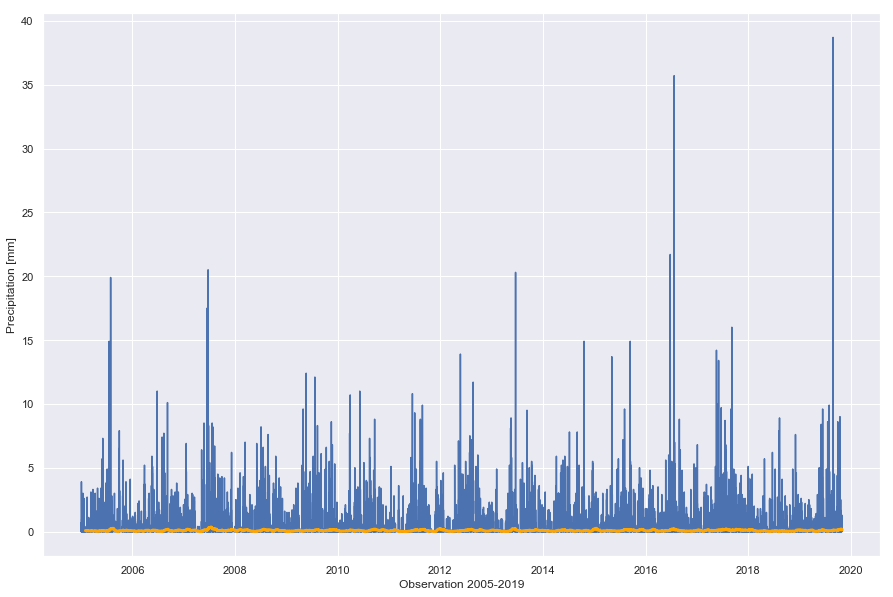

In [119]:
# plot precipitation

plt.figure(figsize=(15,10))

rolling_mean = df2.R1.rolling(window=730).mean()    
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel('Precipitation [mm]');
plt.plot(df2.R1)

plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

# precipitation is not continuous like temperature or pressure 

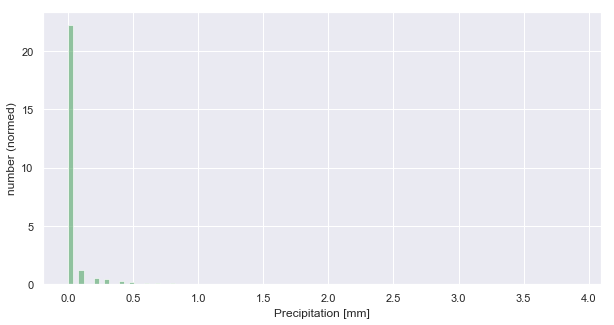

In [120]:
# plot distribution of precipitation

plt.figure(figsize=(10,5))
plt.hist(df2.R1[0:2000], bins=100, alpha=0.6, density=True, color='g');

## POISSON distribution!!!

plt.xlabel('Precipitation [mm]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

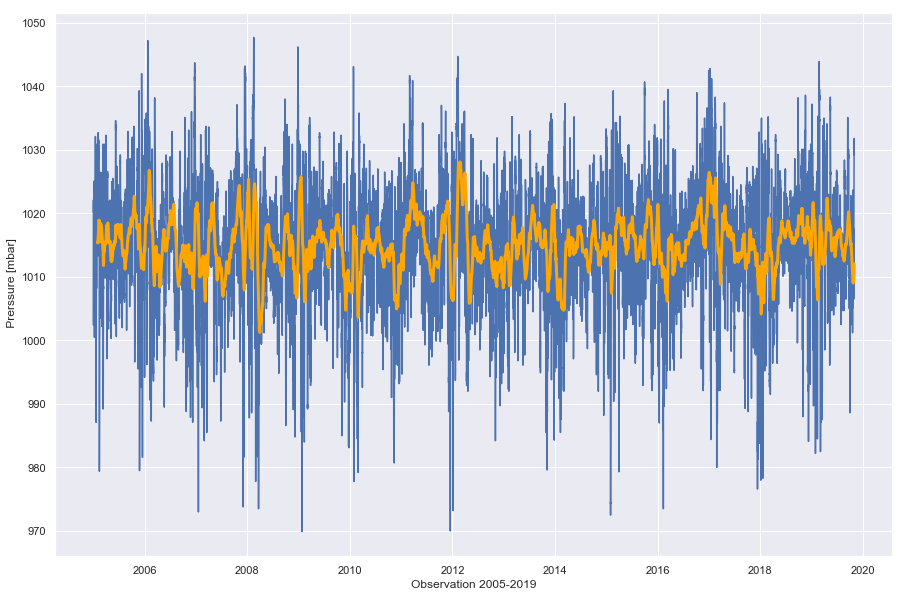

In [121]:
# plot pressure data

plt.figure(figsize=(15,10))

rolling_mean = df2.P.rolling(window=730).mean()    
#df2 = df2.set_index('MESS_DATUM')
plt.xlabel('Observation 2005-2019')
plt.ylabel(' Prerssure [mbar]');
plt.plot(df2.P)

plt.plot(rolling_mean, label='Monthly rolling mean of temperature 2005-2019', color='orange', linewidth=3)

plt.show()

# pressure has a bit of seasonal cycle (winter heigher and summer lower pressure because of different 
# heating)

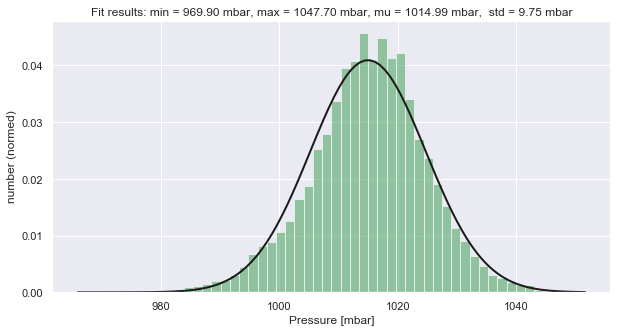

In [147]:
# distribution plot of pressure 

plt.figure(figsize=(10,5))
plt.hist(df2.P, bins=50, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.P)
μ = mu[0]
σ = mu[1]
minimum = df2.P.min()
maximum = df2.P.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} mbar, max = {:.2f} mbar, mu = {:.2f} mbar,  std = {:.2f} mbar".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Pressure [mbar]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.savefig('Images/Pressdist.png', dpi=500);

# distribution has a light skewness (left-skewed), normal pressure is around 1015 mbar

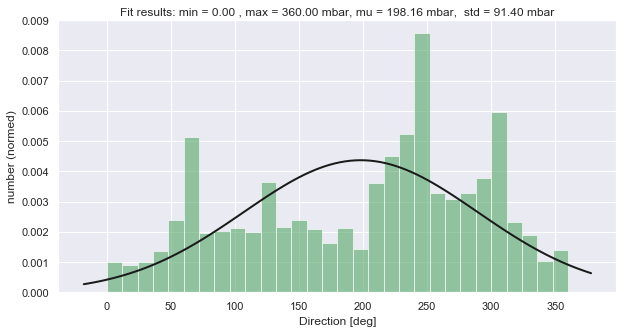

In [123]:
# distribution of wind direction

plt.figure(figsize=(10,5))
plt.hist(df2.DD, bins=30, alpha=0.6, density=True, color='g');

mu = norm.fit(df2.DD)
μ = mu[0]
σ = mu[1]
minimum = df2.DD.min()
maximum = df2.DD.max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);
title = "Fit results: min = {:.2f} , max = {:.2f} mbar, mu = {:.2f} mbar,  std = {:.2f} mbar".format(minimum,maximum,μ, σ)
plt.title(title)
plt.xlabel('Direction [deg]')
plt.ylabel('number (normed)')
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))

# mean wind direction is southwest, strong west component

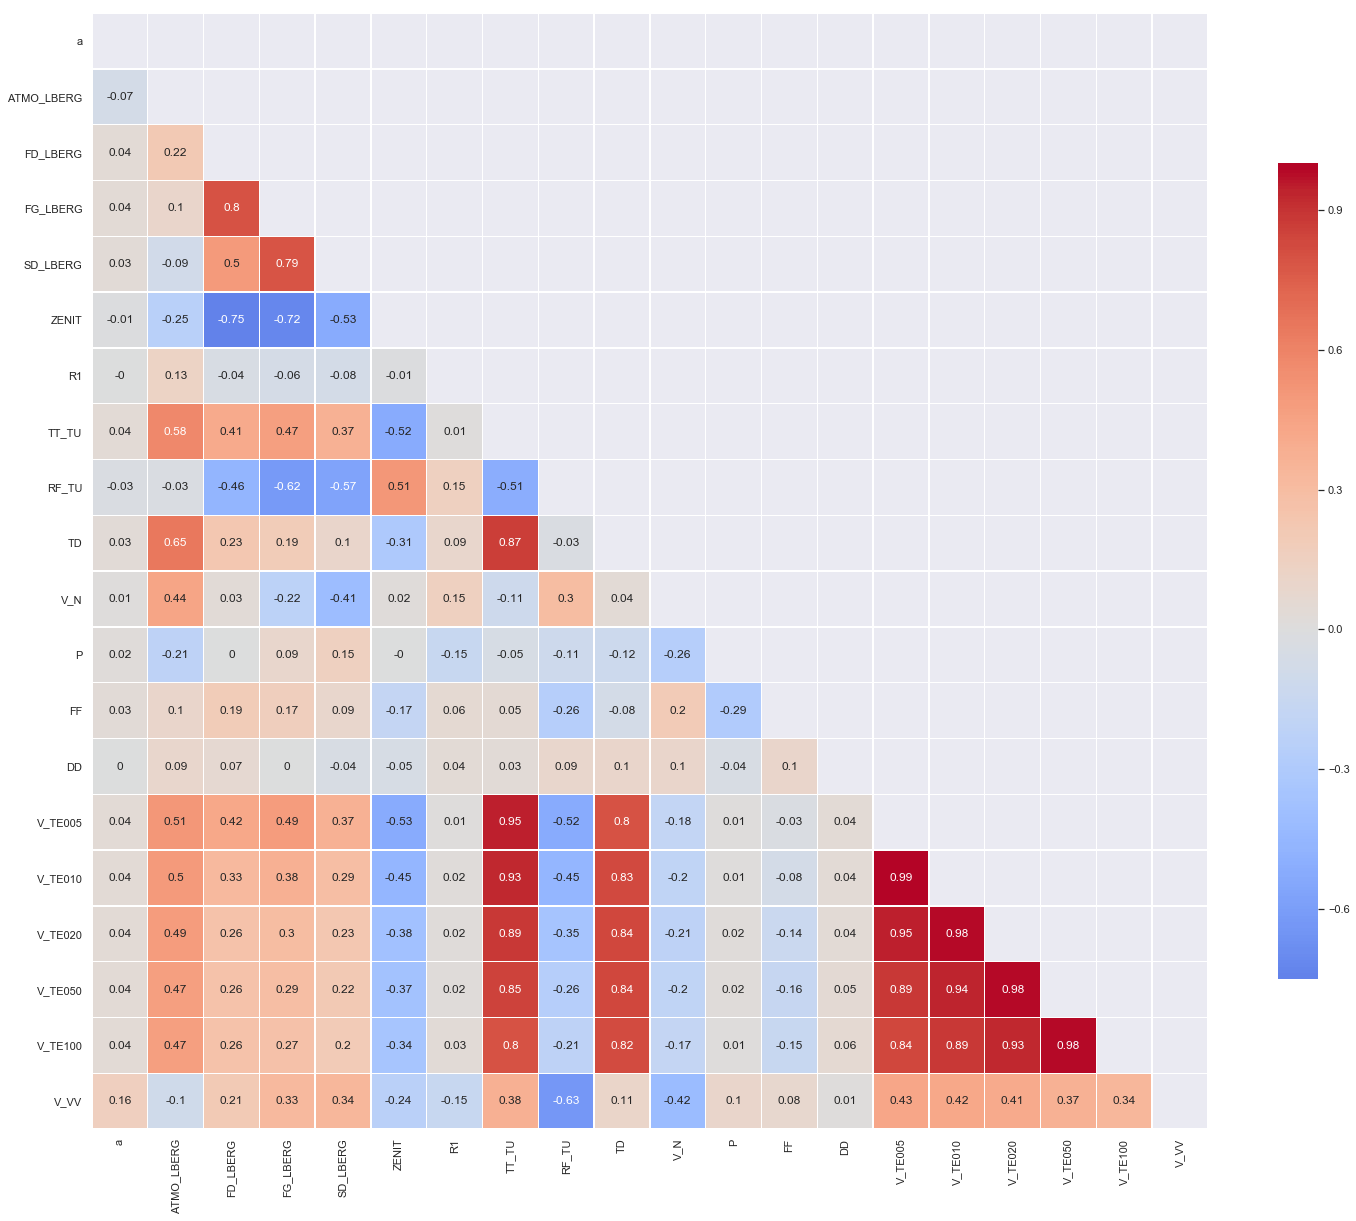

In [124]:
## generation a correlation matrix

corr = df2.corr()
corr = corr.round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,30))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .5});

# correlation matrix shows strong correlation for temperature but not for precipitation, pressure 
# and wind speed

//anaconda3/envs/nf/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/envs/nf/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


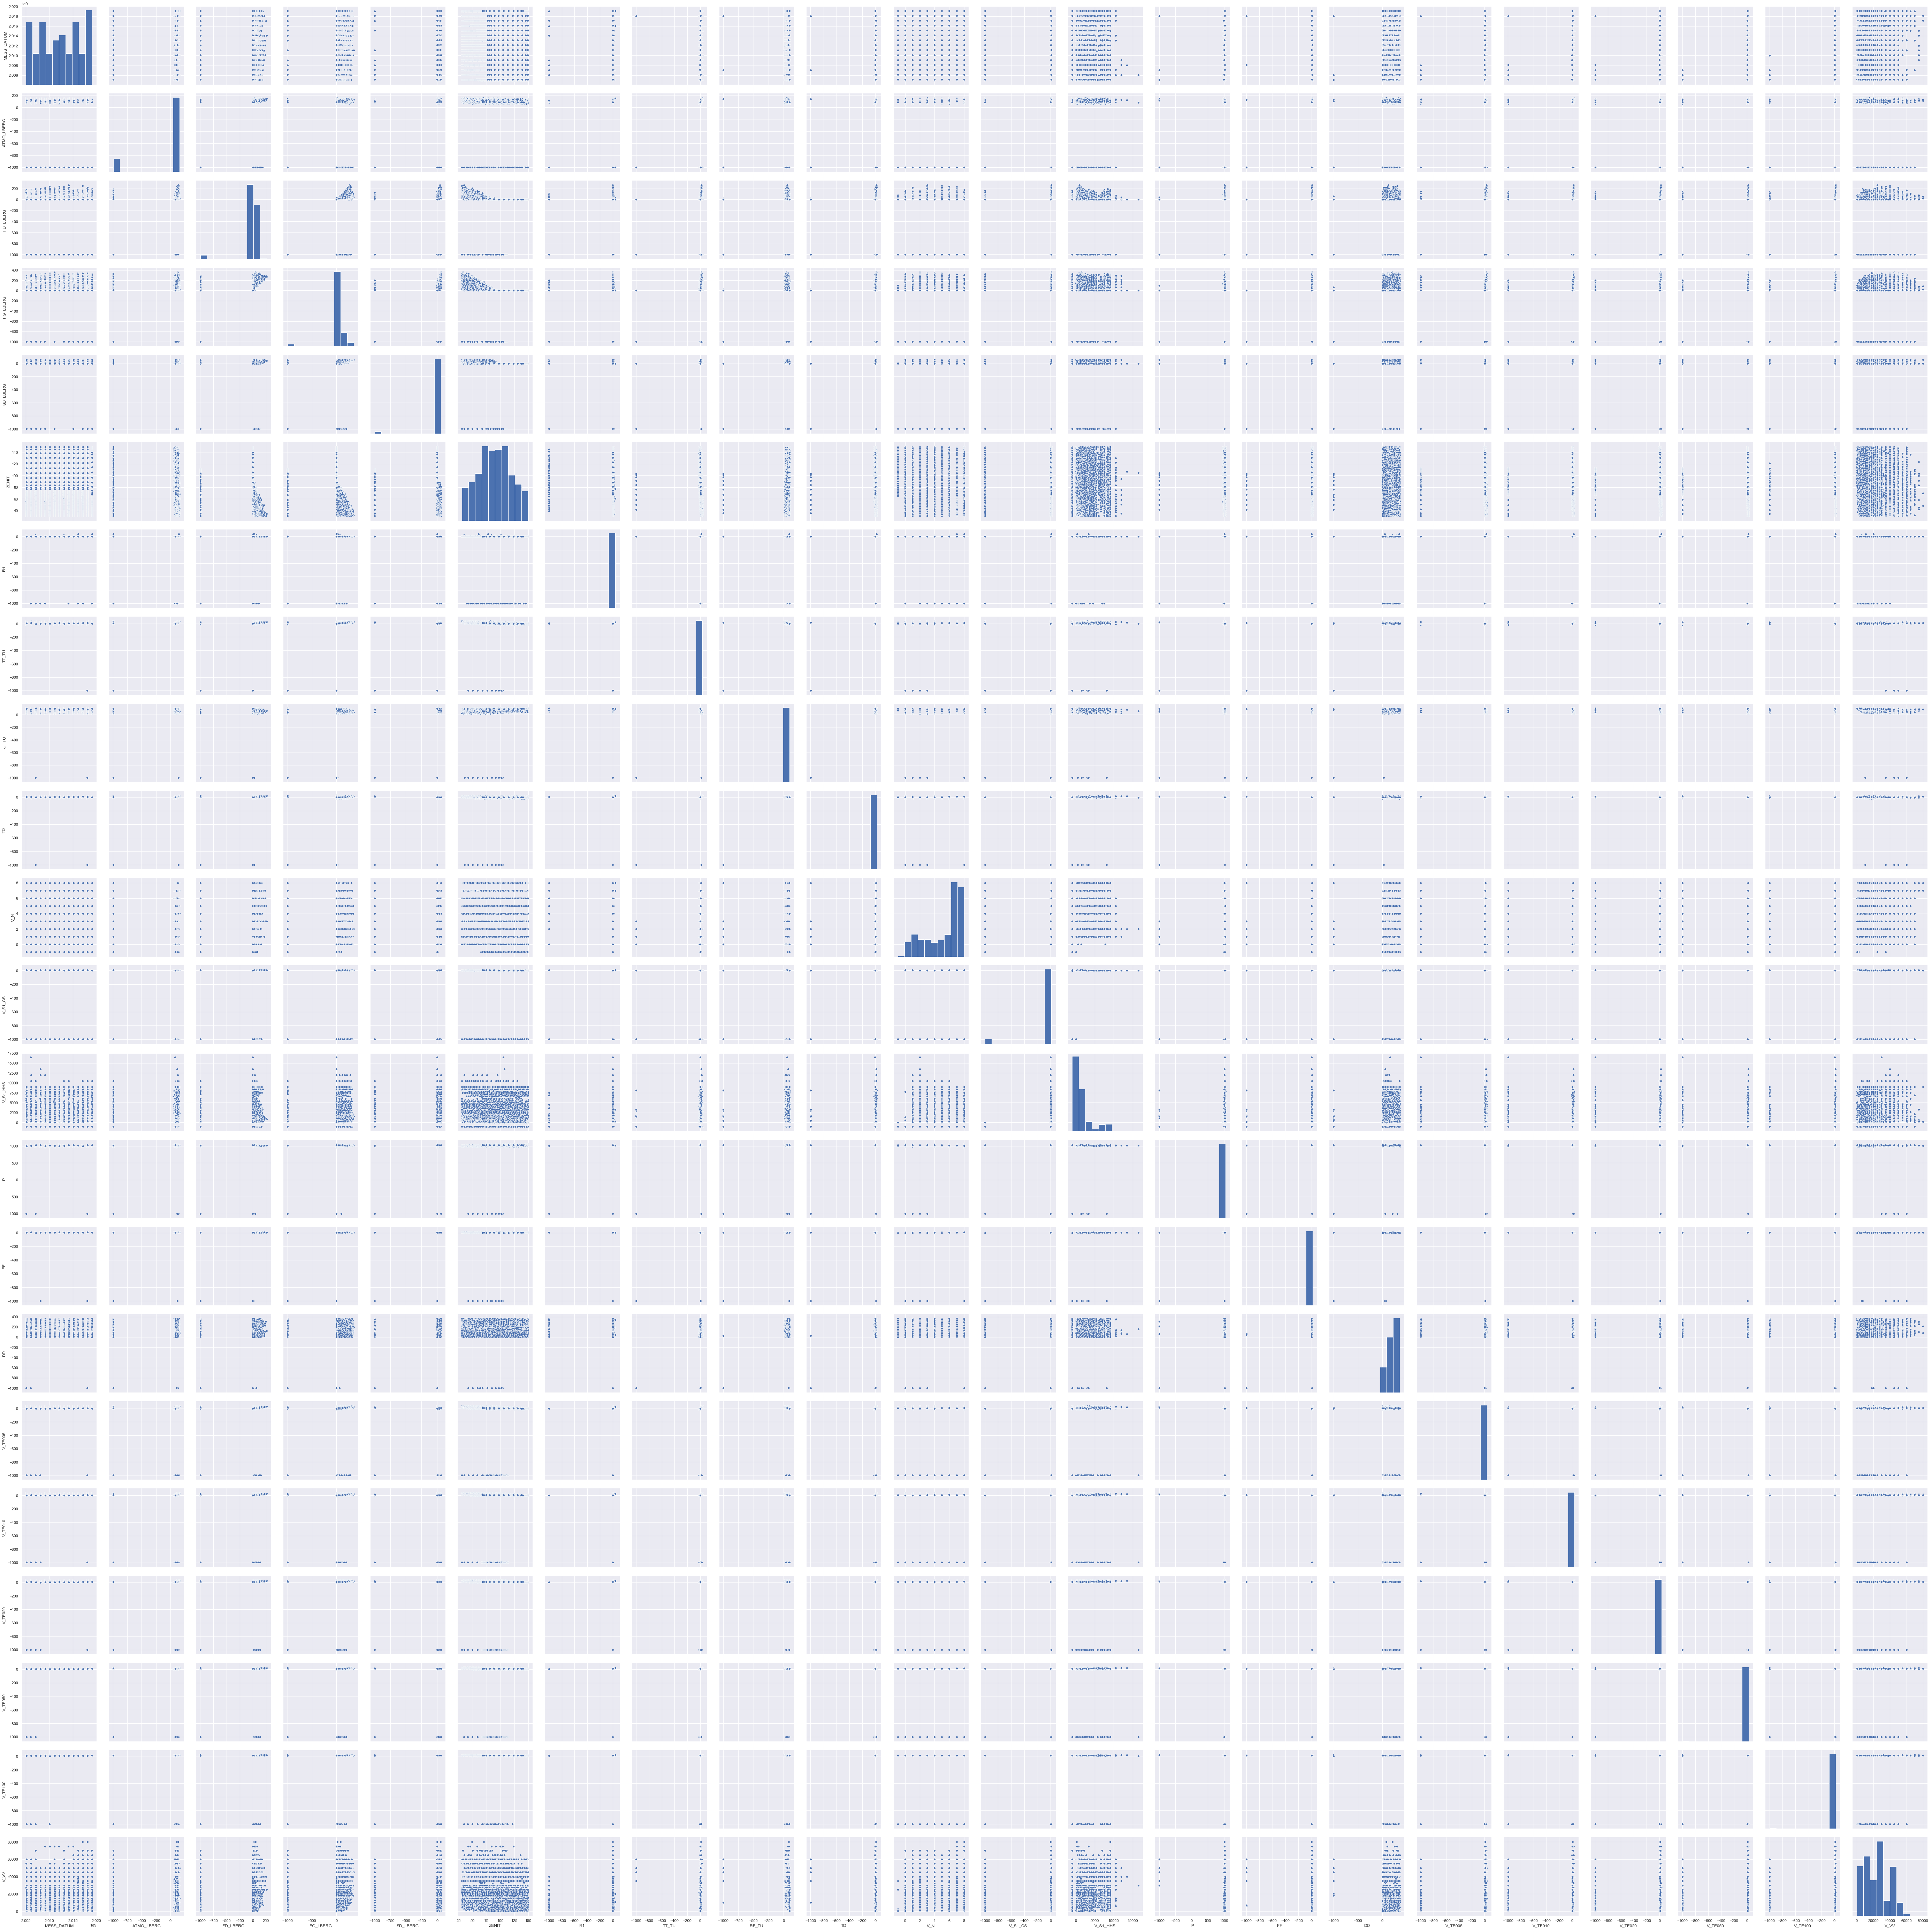

In [44]:
cols = df2.columns
sns.pairplot(df[cols], height = 3.5);

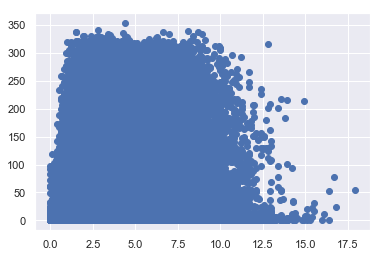

In [125]:
#plt.scatter(df2.FF, df2.RF_TU)
#plt.scatter(df2.FF, df2.P)
#plt.scatter(df2.FF, df2.V_N)
#plt.scatter(df2.FF, df2.ZENIT)
plt.scatter(df2.FF, df2.FG_LBERG)

# relationship between wind speed and most correlated features is not linear!

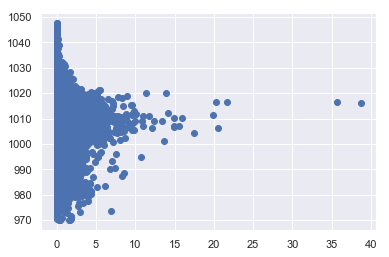

In [126]:
#plt.scatter(df2.R1, df2.ATMO_LBERG)
#plt.scatter(df2.R1, df2.P)
#plt.scatter(df2.R1, df2.V_VV)
#plt.scatter(df2.R1, df2.V_N)
plt.scatter(df2.R1, df2.P)


# relationship between precipitation and most correlated features is not linear!

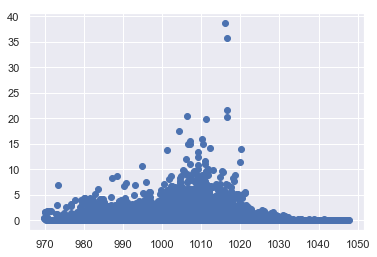

In [127]:
#plt.scatter(df2.P, df2.ATMO_LBERG)
#plt.scatter(df2.P, df2.FF)
#plt.scatter(df2.P, df2.SD_LBERG)
#plt.scatter(df2.P, df2.V_N)
plt.scatter(df2.P, df2.R1)


# relationship between pressure and most correlated features is not linear!
# temperature has linear relationships!

In [128]:
df2.to_csv(r'weather_data_cleaned.csv')

In [ ]:
#### Colclusions ###

# After imputation the dataset got ready to by explored. 3 of 4 target variables have a nonlinear 
# relationship to heighest correlated parameters!
# Target variables: wind speed, pressure and temperature are normal distributed and precipitation has a
# poisson distribution
